---
<strong>
    <h1 align='center'><strong>TF-IDF (Term Frequency-Inverse Document Frequency) </strong></h1>
</strong>

---

## **TF-IDF**

- **Tf-Idf (Term Frequency-Inverse Document Frequency)** is a widely used NLP technique in scikit-learn for analyzing the importance of words in a document.

- It calculates the `weight` of each term in a document based on its `frequency` and `rarity` across a corpus.


$$
\begin{align*}
\text{TF}(t, d) & = \frac{\text{Number of times term } t \text{ appears in document } d}{\text{Total number of terms in document } d} \\
\text{IDF}(t, D) & = \log\left(\frac{\text{Total number of documents in corpus } D}{\text{Number of documents containing term } t + 1}\right) \\
\text{TF-IDF}(t, d, D) & = \text{TF}(t, d) \times \text{IDF}(t, D)
\end{align*}
$$
    
- where `t` represents the term (word) you're interested in.
- `d` represents the specific document you're analyzing.
- `D` represents the entire collection of documents.
- `TF(t,d)` is the Term Frequency, which measures how often term `t` appears in document `d`.
- `IDF(t,D)` is the Inverse Document Frequency, which measures the importance of term `t` across the entire collection `D`.
- `TD-IDF(t, d, D)` is the `TF-IDF` score for the term `t` in document `d` with respect to the entire collection `D`.


### **Term Frequency (TF)**

- - Counts how often a word appears in a document.

- - It's a local measure, specific to each document.

- - **Example:** In a document with 100 words, if the word "cat" appears 5 times, the `TF` for "cat" is `5/100 = 0.05`.

### **Inverse Document Frequency (IDF)**

- Measures how important a word is in the entire collection of documents.

- It's a global measure, shared across all documents.

- **Example:** If there are 1,000,000 documents, and the word "cat" appears in 1000 of them, the IDF for "cat" is `log(1,000,000 / 1000) = 3`.

### **TF-IDF (Term Frequency-Inverse Document Frequency)**

- Combines TF and IDF to evaluate the importance of a word in a specific document relative to its importance in the entire collection.

- It's calculated by multiplying TF and IDF.

- **Example:** If TF for "cat" is `0.05` and IDF is `3`, the TF-IDF for "cat" in that document is `0.05 * 3 = 0.15`.

### **Use in Text Analysis**

- TF-IDF is commonly used in information retrieval and text mining tasks.

- It helps identify important words in a document, highlighting terms that are both frequent in the document and rare across the collection.

- Used for tasks like document ranking, text classification, and keyword extraction.

### **Higher TF-IDF Values**

- Words with higher TF-IDF values are more significant within a specific document.

- They often represent the key topics or themes of that document.

### **Lower TF-IDF Values**

- Words with lower TF-IDF values are common and less distinctive.

- They might include common stop words like "the," "and," "in," etc., which appear frequently in most documents.

- In scikit-learn, Tf-Idf can be used for various NLP tasks, including:
  - Text classification
  - Clustering
  - Dimensionality reduction


**In essence, TF-IDF helps us find words that are important in a document by considering how often they appear in that document compared to how often they appear in all documents. Higher TF-IDF values indicate greater importance within a specific context.**


In [1]:
from pprint import pprint

In [2]:
import nltk

# Download a specific NLTK dataset, e.g., the 'punkt' tokenizer models.
nltk.download('punkt', quiet=True)

# Download the NLTK stopwords dataset, which contains common stopwords for various languages.
nltk.download('stopwords', quiet=True)

# Download the WordNet lexical database, which is used for various NLP tasks like synonym and antonym lookup.
nltk.download('wordnet')

# Download the NLTK averaged perceptron tagger, which is used for part-of-speech tagging.
# nltk.download('averaged_perceptron_tagger')


# Download the NLTK names dataset, which contains a list of common first names and last names.
# nltk.download('names')

# Download the NLTK movie_reviews dataset, which contains movie reviews categorized as positive and negative.
# nltk.download('movie_reviews')

# Download the NLTK reuters dataset, which is a collection of news documents categorized into topics.
# nltk.download('reuters')

# Download the NLTK brown corpus, which is a collection of text from various genres of written American English.
# nltk.download('brown')

[nltk_data] Downloading package wordnet to /root/nltk_data...


True

Feature names (words) from the vectorizer: ['black' 'cat' 'dog'] 

TF-IDF matrix:


,black,cat,dog
0,0.613356,0.789807,0.000000
1,0.613356,0.000000,0.789807
2,0.481334,0.619805,0.619805


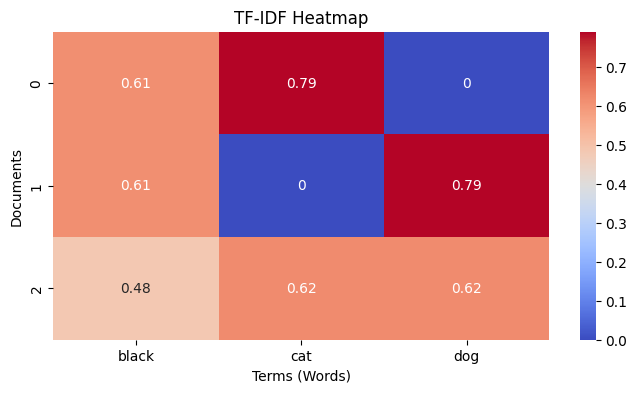

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer

# Sample documents
documents = [
    "black cat.",
    "black dog.",
    "black cat dog."
]

# Initialize the TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer()

# Fit and transform the documents to compute the TF-IDF values
tfidf_matrix = tfidf_vectorizer.fit_transform(documents)

# Get the feature names (words) from the vectorizer
feature_names = tfidf_vectorizer.get_feature_names_out()
print("Feature names (words) from the vectorizer:", feature_names, "\n")

# Create a TF-IDF DataFrame for better visualization (optional)
tfidf_df = pd.DataFrame(data=tfidf_matrix.toarray(), columns=feature_names)

# Print the TF-IDF matrix
print("TF-IDF matrix:")
display(tfidf_df)
print("\n")

# Plotting tf-idf heatmap
# Create a heatmap of the TF-IDF matrix
plt.figure(figsize=(8, 4))
sns.heatmap(tfidf_matrix.toarray(), cmap='coolwarm', annot=True, xticklabels=feature_names, yticklabels=range(len(documents)))
plt.title('TF-IDF Heatmap')
plt.xlabel('Terms (Words)')
plt.ylabel('Documents')
plt.show()

In [4]:
text = """
       Natural Language Processing (NLP) is a field of artificial intelligence that focuses
       on the interaction between computers and humans through natural language. The ultimate
       goal of NLP is to enable computers to understand, interpret, and generate human language
       in a way that is both meaningful and useful. NLP techniques are used in a wide range of
       applications, including machine translation, speech recognition, sentiment analysis,
       chatbots, and information retrieval. It involves various tasks such as tokenization,
       part-of-speech tagging, named entity recognition, and syntactic parsing. NLTK is a popular
       Python library for NLP, providing tools and resources for tasks like text processing, text
       classification, and language modeling. It offers a wide range of functions and datasets
       to help you get started with NLP projects. In this sample text, we'll demonstrate some
       basic NLP tasks using NLTK, such as tokenization and part-of-speech tagging.
       Let's get started!
      """

# Cleaning the texts
import re
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
import nltk

ps = PorterStemmer()
wordnet = WordNetLemmatizer()
sentences = nltk.sent_tokenize(text)

corpus = []

for i in range(len(sentences)):
    cleaned_sentence = re.sub('[^a-zA-Z]', ' ', sentences[i]) # Removes all characters from sentences[i] that are not alphabetic characters and replaces them with spaces.
    cleaned_sentence = cleaned_sentence.lower()
    cleaned_sentence = cleaned_sentence.split()
    cleaned_sentence = [wordnet.lemmatize(word) for word in cleaned_sentence if not word in set(stopwords.words('english'))]
    cleaned_sentence = ' '.join(cleaned_sentence)
    corpus.append(cleaned_sentence)

print(corpus)
print("\n")

# Creating the TF-IDF model
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer()
tfidf_df = tfidf_vectorizer.fit_transform(corpus).toarray()

# Get the feature names (words) from the vectorizer
feature_names = tfidf_vectorizer.get_feature_names_out()
print("Feature names (words) from the vectorizer:", feature_names, "\n")

# Printing the TF-IDF matrix
import pandas as pd

# Creating a DataFrame to display the TF-IDF matrix
tfidf_df = pd.DataFrame(tfidf_df, columns=tfidf_vectorizer.get_feature_names_out())

# Displaying the TF-IDF matrix
print(tfidf_df)

['natural language processing nlp field artificial intelligence focus interaction computer human natural language', 'ultimate goal nlp enable computer understand interpret generate human language way meaningful useful', 'nlp technique used wide range application including machine translation speech recognition sentiment analysis chatbots information retrieval', 'involves various task tokenization part speech tagging named entity recognition syntactic parsing', 'nltk popular python library nlp providing tool resource task like text processing text classification language modeling', 'offer wide range function datasets help get started nlp project', 'sample text demonstrate basic nlp task using nltk tokenization part speech tagging', 'let get started']


Feature names (words) from the vectorizer: ['analysis' 'application' 'artificial' 'basic' 'chatbots' 'classification'
 'computer' 'datasets' 'demonstrate' 'enable' 'entity' 'field' 'focus'
 'function' 'generate' 'get' 'goal' 'help' 'human

**heatmap**

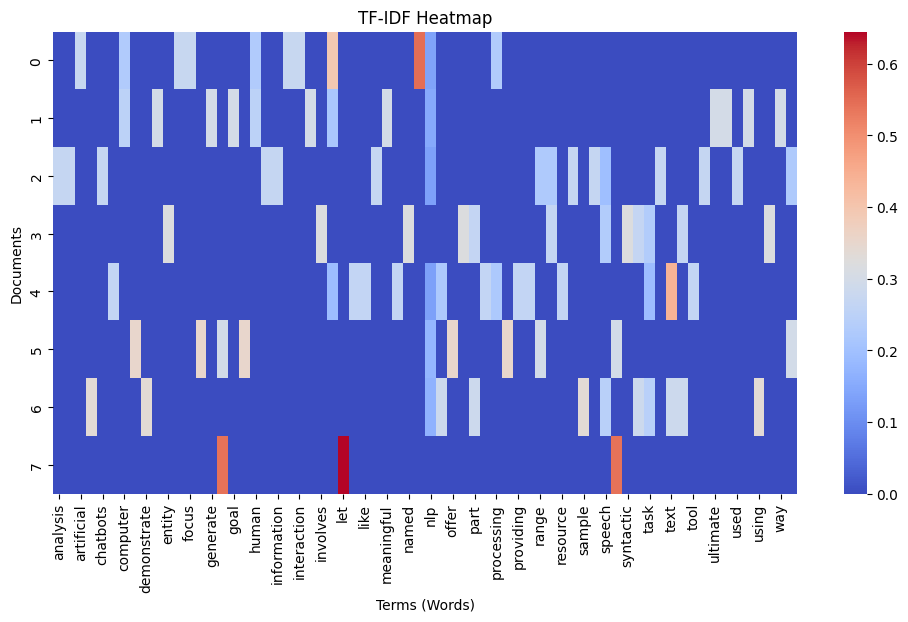

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Your TF-IDF matrix stored in tfidf_df
# Make sure tfidf_df is already defined as in your code

# Plotting the heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(tfidf_df, cmap='coolwarm')
plt.title('TF-IDF Heatmap')
plt.xlabel('Terms (Words)')
plt.ylabel('Documents')
plt.show()

**barchart**

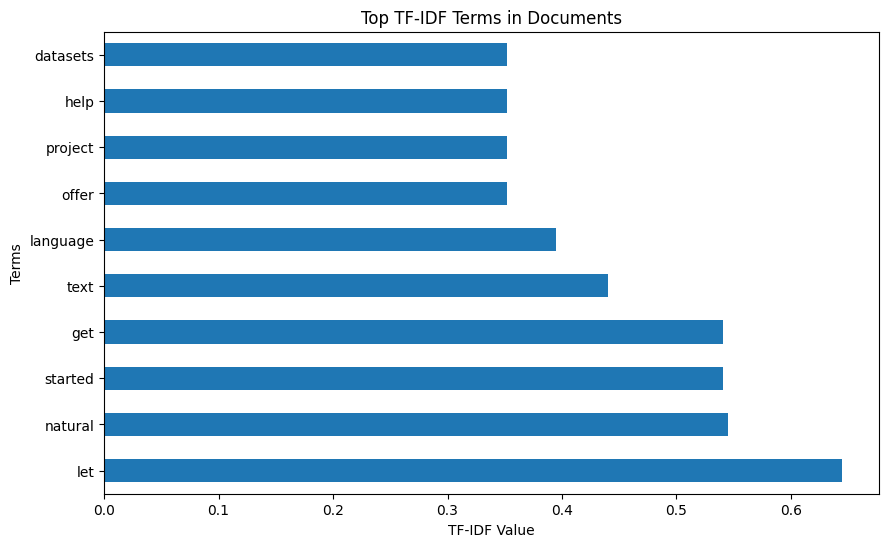

In [6]:
import matplotlib.pyplot as plt

# Assuming tfidf_df is your TF-IDF DataFrame
top_terms = tfidf_df.max(axis=0).sort_values(ascending=False)[:10]
top_terms.plot(kind='barh', figsize=(10, 6))
plt.title('Top TF-IDF Terms in Documents')
plt.xlabel('TF-IDF Value')
plt.ylabel('Terms')
plt.show()

**wordcloud**

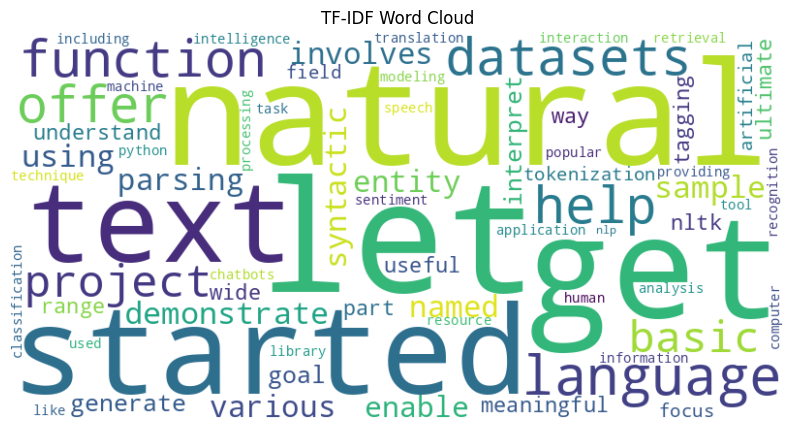

In [7]:
from wordcloud import WordCloud

# Assuming tfidf_df is your TF-IDF DataFrame
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(tfidf_df.max())
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('TF-IDF Word Cloud')
plt.show()